In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
pima_df = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima_df[~pima_df.applymap(np.isreal).all(1)]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [6]:
pima_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [7]:
pima_df.count().isna()

Preg     False
Plas     False
Pres     False
skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [9]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
pima_df.groupby(['class']).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


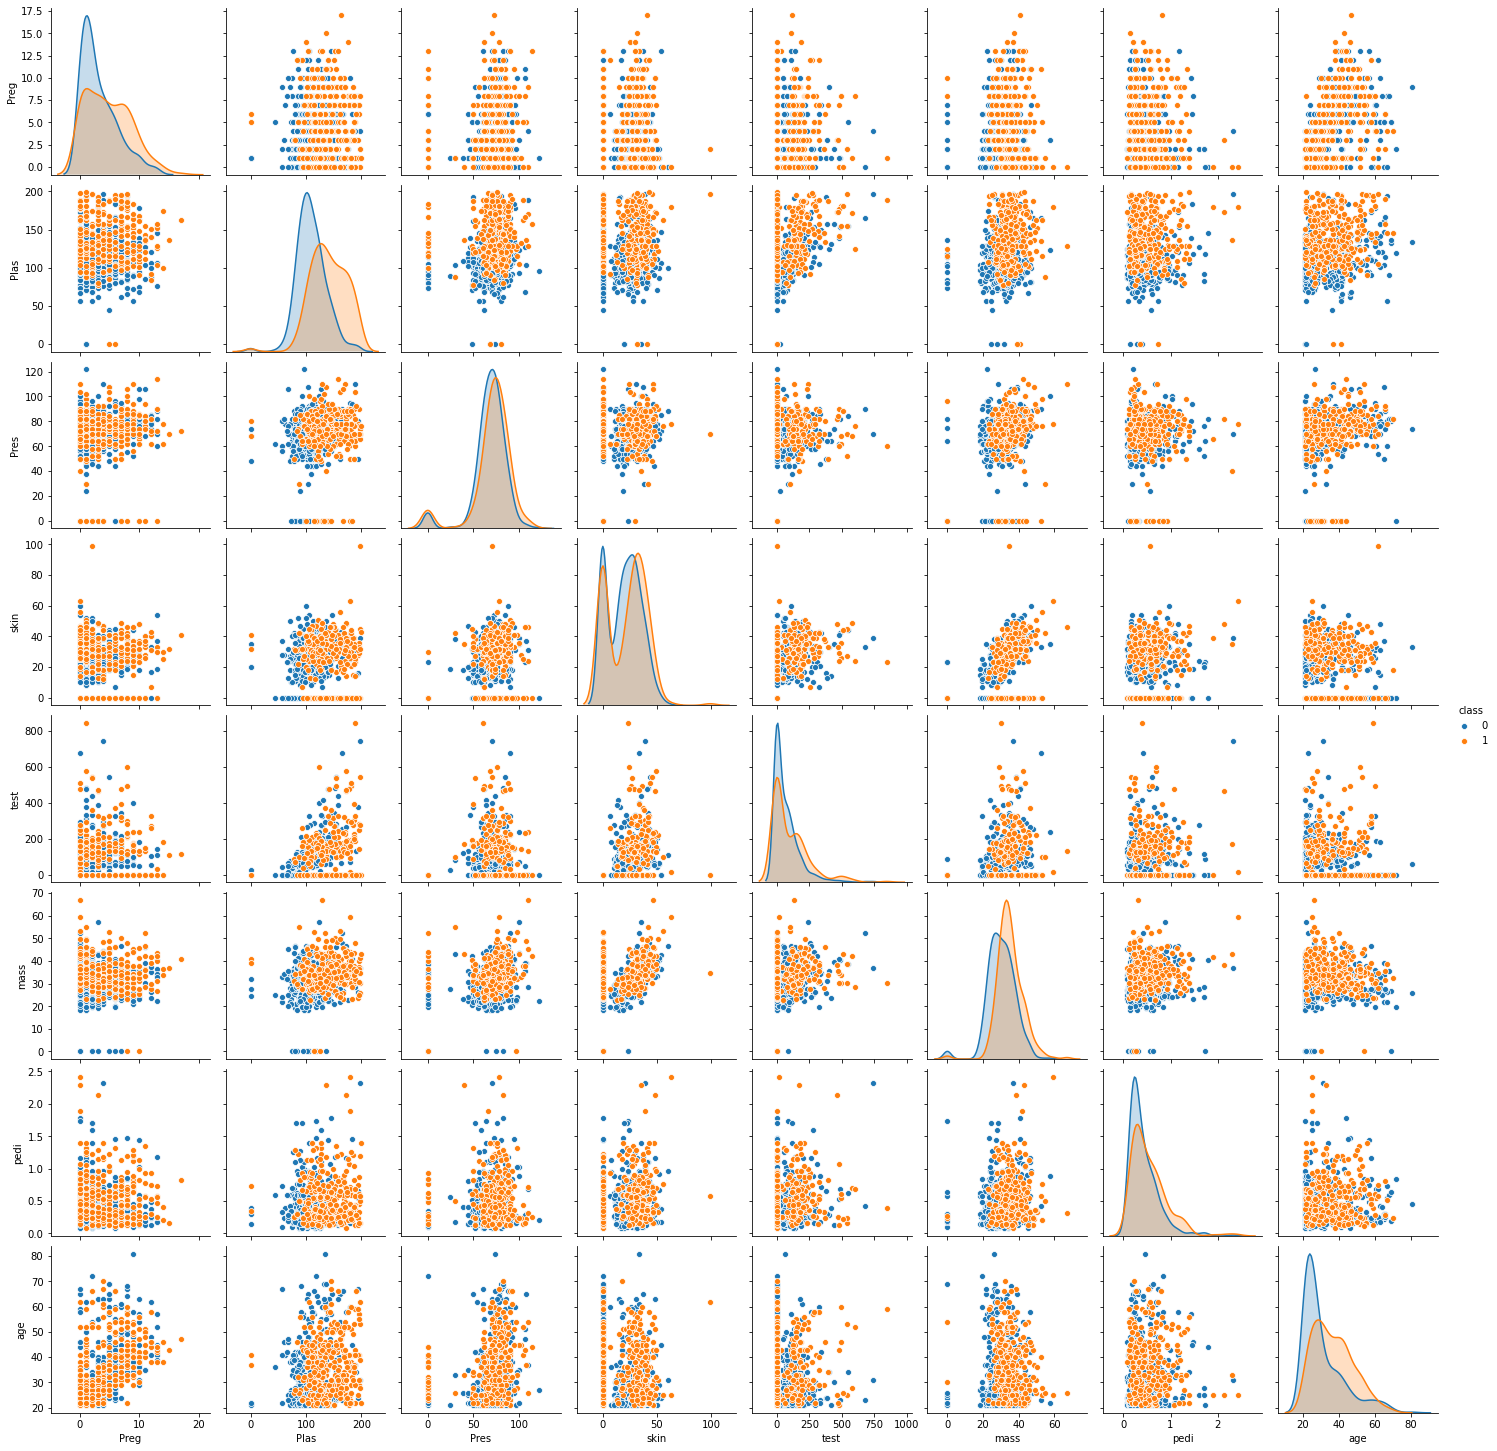

In [13]:
sns.pairplot(pima_df, diag_kind = 'kde', hue='class')

In [16]:
array = pima_df.values
X = array[:,0:7]
Y = array[:,8]
test_size = 0.30
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=test_size, random_state=seed)

In [17]:
type(x_train)

numpy.ndarray

In [18]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7619047619047619
[[131  16]
 [ 39  45]]


C:\Users\Daoudapc\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
from sklearn import preprocessing

x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

In [21]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_predict = model.predict(x_test_scaled)
model_score = model.score(x_test_scaled, y_test)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.7792207792207793
[[134  13]
 [ 38  46]]


##### Analyzing the confusion matrix
##### True Positives (TP): we correctly predicted that they do have diabetes 46

##### True Negatives (TN): we correctly predicted that they don't have diabetes 134

##### False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 13 Falsely predict positive Type I error

##### False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 38 Falsely predict negative Type II error